In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.base import BaseEstimator, ClassifierMixin


In [2]:
df = pd.read_csv("smoking_driking_dataset_Ver01.csv.gz")

In [3]:
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


# Data Preparation
## Check for Missing Values

In [4]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

# Data Processing

## Converting categorical columns into 0 and 1

In [5]:
df.head(5)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [6]:
df["sex"] = (df["sex"] == "Male").astype(int)
df["DRK_YN"] = (df["DRK_YN"] == "Y").astype(int)

In [7]:
X = df.drop("DRK_YN", axis = 1)
y = df["DRK_YN"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8,shuffle = True, random_state = 42)

In [26]:
class Logistic(BaseEstimator, ClassifierMixin):
    
    def __init__(self, learning_rate = 1000, alpha = 0.01):
        self.learning_rate = learning_rate
        self.alpha = alpha
              
        
        
    def fit(self, X, y):
        
       
        self.cost_list = []
        self.ite_list = []
        self.theta_history = []
        
        X = np.c_[X, np.ones(X.shape[0])]
        self.theta = np.zeros(X.shape[1])
        m = len(X)
        
        for i in range(self.learning_rate):
        
            z = np.dot(X, self.theta)
            h_x = 1/(1+np.exp(-z))
            epsilon = 1e-15

            J_theta = (-1/m)*np.sum((y * np.log(h_x + epsilon)) + ((1-y)* np.log(1 - h_x + epsilon)))

            grad_theta = (1/m)*np.dot(X.T, (h_x - y))

            self.theta -= self.alpha * grad_theta
            
            self.cost_list.append(J_theta) 
            self.theta_history.append(self.theta.copy())  # Store theta at each step

            
        return self
    
    def predict(self, X):
        
        X = np.c_[X, np.ones(X.shape[0])]
        
        z = np.dot(X, self.theta)
        h_x = 1/(1+ np.exp(-z))
        
        return ((h_x >= 0.5)).astype(int)
              

In [10]:
pipeline = Pipeline([
    ('standardising', StandardScaler()),
    ('mode', Logistic(1000, 0.01))
])

In [11]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardising', StandardScaler()), ('mode', Logistic())])

In [12]:
param_grid = {
    "learning_rate": [500,1000,1500,2000,2500],
    "alpha" : [0.1,0.01,0.001]
}

In [15]:
def gridsearch(pipeline, X, y, param_grid, cv = 5):
    best_score = -np.inf
    best_params = None
    results = []
    
    
    kf = KFold(cv, shuffle = True, random_state = 42)

    for al in param_grid["alpha"]:
        for lr in param_grid["learning_rate"]:
            scores = []

    
            for train_index, test_index in kf.split(X):
            
                X_train, X_val = X.iloc[train_index], X.iloc[test_index]
                y_train, y_val = y.iloc[train_index], y.iloc[test_index]
                
                pipeline.set_params(   
                    mode__alpha = al,
                    mode__learning_rate = lr   
                )
                
                pipeline.fit(X_train, y_train)
                
                y_pred = pipeline.predict(X_val)  
                
                scores.append(np.mean(y_pred == y_val))
                
            mean_score = np.mean(scores)
            results.append((lr, al, mean_score))
            
                
            if mean_score >= best_score:
                best_score = mean_score
                    
                best_params = {
                    "alpha" : al,
                    "learning_rate": lr
                }
                    
    return best_params, results, best_score
                
        
        

In [16]:
X_subset, _, y_subset, _ = train_test_split(X_train, y_train, train_size=0.2, random_state=42)

In [17]:
best_params, results, best_score = gridsearch(pipeline, X_subset, y_subset, param_grid, cv = 5) 

In [18]:
best_params

{'alpha': 0.1, 'learning_rate': 2500}

In [19]:
results

[(500, 0.1, 0.7263310531790814),
 (1000, 0.1, 0.7268543328184599),
 (1500, 0.1, 0.7269741197238597),
 (2000, 0.1, 0.7270497746114806),
 (2500, 0.1, 0.727056079185449),
 (500, 0.01, 0.71373451439019),
 (1000, 0.01, 0.7198310374176465),
 (1500, 0.01, 0.722472653910412),
 (2000, 0.01, 0.7239920562367999),
 (2500, 0.01, 0.7245720770418939),
 (500, 0.001, 0.7015351637613089),
 (1000, 0.001, 0.7027582511111812),
 (1500, 0.001, 0.7047126690413896),
 (2000, 0.001, 0.7062320713677772),
 (2500, 0.001, 0.707474072439555)]

In [20]:
best_score

0.727056079185449

# Best Params:

{'alpha': 0.1, 'learning_rate': 2500}



[(500, 0.1, 0.7263310531790814),
 (1000, 0.1, 0.7268543328184599),
 (1500, 0.1, 0.7269741197238597),
 (2000, 0.1, 0.7270497746114806),
 (2500, 0.1, 0.727056079185449),
 (500, 0.01, 0.71373451439019),
 (1000, 0.01, 0.7198310374176465),
 (1500, 0.01, 0.722472653910412),
 (2000, 0.01, 0.7239920562367999),
 (2500, 0.01, 0.7245720770418939),
 (500, 0.001, 0.7015351637613089),
 (1000, 0.001, 0.7027582511111812),
 (1500, 0.001, 0.7047126690413896),
 (2000, 0.001, 0.7062320713677772),
 (2500, 0.001, 0.707474072439555)]

# Now fit the model again on the train data using best params

In [27]:
pipeline.set_params(mode = Logistic(learning_rate = 2500, alpha = 0.1))

Pipeline(steps=[('standardising', StandardScaler()),
                ('mode', Logistic(alpha=0.1, learning_rate=2500))])

In [28]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardising', StandardScaler()),
                ('mode', Logistic(alpha=0.1, learning_rate=2500))])

# contour plot

In [38]:
def plot_contour_and_path(X, y, logistic_model):
    """
    Plot the contour of the cost function and the gradient descent path.

    Parameters:
        X (numpy.ndarray): Feature matrix with two features.
        y (numpy.ndarray): Target vector.
        logistic_model: Trained Logistic regression model.
    """
    # Add bias term to X
    X = np.c_[X, np.ones(X.shape[0])]

    # Generate grid of theta0 and theta1
    theta0_vals = np.linspace(-0.5, 0.5, 100)
    theta1_vals = np.linspace(-0.5, 0.5, 100)
    theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)

    # Compute cost for each combination of theta0 and theta1
    costs = np.zeros_like(theta0_grid)
    for i in range(theta0_grid.shape[0]):
        for j in range(theta0_grid.shape[1]):
            # Create theta vector with two variables and bias term
            theta = np.array([theta0_grid[i, j], theta1_grid[i, j], logistic_model.theta[-1]])
            z = np.dot(X, theta)
            h_x = 1 / (1 + np.exp(-z))
            epsilon = 1e-15
            costs[i, j] = (-1 / len(y)) * np.sum(
                y * np.log(h_x + epsilon) + (1 - y) * np.log(1 - h_x + epsilon)
            )

    # Plot contour
    plt.figure(figsize=(10, 6))
    cp = plt.contourf(theta0_vals, theta1_vals, costs, levels=50, cmap="viridis")
    plt.colorbar(cp)
    plt.title("Cost Function Contour and Gradient Descent Path")
    plt.xlabel(r"$\theta_0$")
    plt.ylabel(r"$\theta_1$")

    # Overlay gradient descent path
    theta_history = np.array(logistic_model.theta_history)
    plt.plot(theta_history[:, 0], theta_history[:, 1], 'r-o', label="Gradient Descent Path")
    plt.legend()
    plt.show()


In [30]:
logistic_model = pipeline.named_steps['mode']


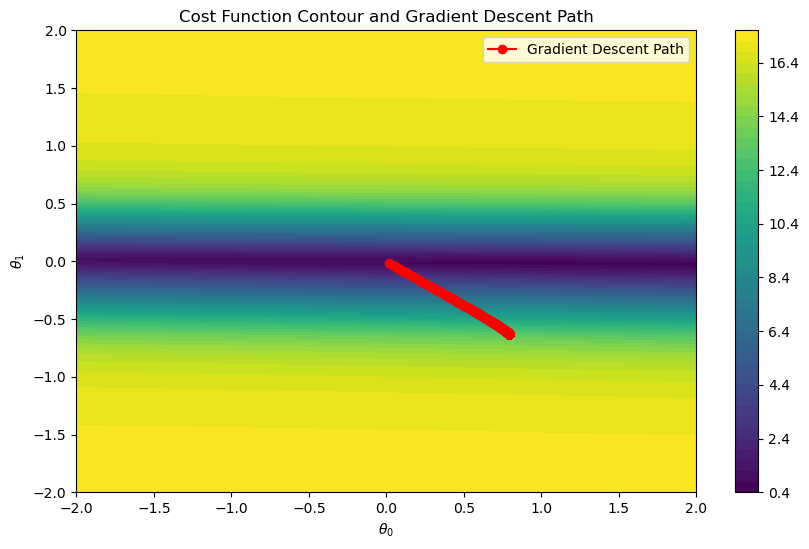

In [36]:
X_subset = X_train.iloc[:, :2]  # Use the first two features
y_subset = y_train

# Train the pipeline
pipeline.set_params(mode=Logistic(learning_rate=1000, alpha=0.1))
pipeline.fit(X_subset.to_numpy(), y_subset.to_numpy())

# Extract logistic model
logistic_model = pipeline.named_steps['mode']

# Plot the contour and gradient descent path



In [ ]:
plot_contour_and_path(X_subset.to_numpy(), y_subset.to_numpy(), logistic_model)

In [ ]:
kf = KFold(5, shuffle = True, random_state = 42)

In [ ]:
for train_index, test_index in kf.split(X):
    print()

    print(len(train_index))
    print(len(test_index))

In [ ]:
Y_pred_train, re_X = pipeline.predict(X_train)

In [ ]:
np.mean(Y_pred_train ==  y_train)

In [25]:
history = []

a1 = np.array([1,2,3])

history.append(a1.copy())
a1[0] = 99

history

[array([1, 2, 3])]